# Rosenblatt Perceptron

### Parameters

In [3]:
IMAGE_HEIGHT = 20
IMAGE_WIDTH = 20
EPOCHS = 100000

### Importing packages

In [4]:
# Standard packages
import random

# Installed packages
import matplotlib.pyplot as plt

# Local modules
from perceptron import Perceptron
from random_figure import (FigureGenerator,
                           RectangleGenerator,
                           CircleGenerator)

### Rectangle image generation

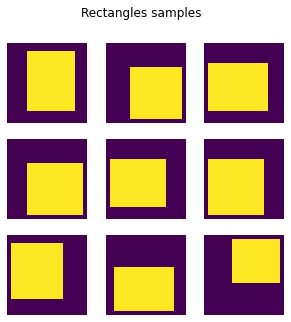

In [7]:
rect_gen = RectangleGenerator()
rect_gen.set_canvas_dimensions(IMAGE_HEIGHT, IMAGE_WIDTH)
rect_gen.set_min_figure(int(IMAGE_HEIGHT*0.50), int(IMAGE_WIDTH*0.50))
rect_gen.set_max_figure(int(IMAGE_HEIGHT*0.80), int(IMAGE_WIDTH*0.80))

# Plot samples
rows, cols = 3, 3
fig, ax = plt.subplots(rows, cols, figsize=(5, 5))
fig.suptitle('Rectangles samples')

for i in range(rows):
    for j in range(cols):
        ax[i, j].imshow(rect_gen.generate())
        ax[i, j].axis('off')

### Circle image generation

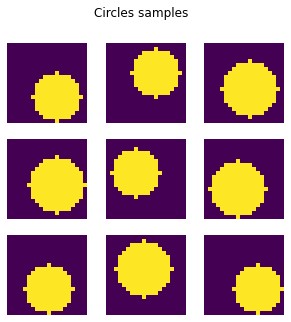

In [8]:
circ_gen = CircleGenerator()
circ_gen.set_canvas_dimensions(IMAGE_HEIGHT, IMAGE_WIDTH)
circ_gen.set_min_figure(int(IMAGE_HEIGHT*0.50), int(IMAGE_WIDTH*0.50))
circ_gen.set_max_figure(int(IMAGE_HEIGHT*0.80), int(IMAGE_WIDTH*0.80))

# Plot samples
rows, cols = 3, 3
fig, ax = plt.subplots(rows, cols, figsize=(5, 5))
fig.suptitle('Circles samples')

for i in range(rows):
    for j in range(cols):
        ax[i, j].imshow(circ_gen.generate())
        ax[i, j].axis('off')

### Perceptron training

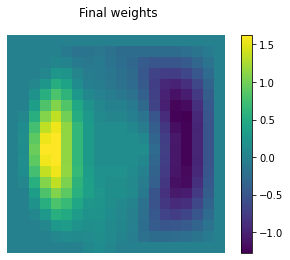

In [9]:
perceptron = Perceptron(bias=5, learning_rate=0.0001, height=IMAGE_HEIGHT, width=IMAGE_WIDTH)

for _ in range(EPOCHS):

    # Generate figure
    is_circle = random.choice([True, False])
    figure = circ_gen.generate() if is_circle else rect_gen.generate()

    # Fit perceptron
    perceptron.fit(should_activate=is_circle, figure=figure)

# Plot final weights
plt.imshow(perceptron.weights)
plt.suptitle('Final weights')
plt.axis('off')
plt.colorbar()

### Testing the Perceptron

In [11]:
SAMPLES = 1000

def test_figure(figure_generator:FigureGenerator,
                should_activate:bool,
                iterations:int):
    """Test figures, return number of hits and avg scalar product"""

    hits = 0
    scalar_products = []

    for _ in range(iterations):
        new_figure = figure_generator.generate()
        is_activated, scalar_product = perceptron.predict(new_figure)

        if is_activated == should_activate:
            hits += 1

        scalar_products.append(scalar_product)

    return hits, sum(scalar_products) / iterations

# Test circles and rectangles
samples_per_figure = int(SAMPLES/2)
circles_hits, circle_avg_sp = test_figure(circ_gen, True, samples_per_figure)
rectangles_hits, rectangle_avg_sp = test_figure(rect_gen, False, samples_per_figure)

# Output data
print(f'Total samples\t{SAMPLES}')

total_hits = circles_hits + rectangles_hits
print(f'Total hits\t{total_hits} ({round(total_hits/SAMPLES * 100, 3)}%)')

print('\n\t\tsamples\t\thits\t\taccuracy\tavg. scalar product')
print(f'Circles'
      f'\t\t{samples_per_figure}'
      f'\t\t{circles_hits}'
      f'\t\t{round(circles_hits/samples_per_figure * 100, 3)}%'
      f'\t\t{circle_avg_sp}')
print(f'Rectangles'
      f'\t{samples_per_figure}'
      f'\t\t{rectangles_hits}'
      f'\t\t{round(rectangles_hits/samples_per_figure * 100, 3)}%'
      f'\t\t{rectangle_avg_sp}')

Total samples	1000
Total hits	683 (68.3%)

		samples		hits		accuracy	avg. scalar product
Circles		500		327		65.4%		15.67973120000298
Rectangles	500		356		71.2%		-49.12225499999141
